In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

CARS = [
    "ford",
    "bmw",
    "fiat",
    "toyota",
    "peugeot",
    "audi",
    "mercedes",
    "volvo",
    "nissan",
    "suzuki",
    "volkswagen",
    "renault",
    "skoda",
    "opel"
]

cars = pd.read_csv("cars_year_price.csv", sep=";")
cars.head(20)

,car,year,mean_price
0,ford,1995.0,653.67
1,ford,2002.0,1167.04
2,ford,2005.0,2311.19
3,ford,2006.0,3688.57
4,ford,2007.0,3478.46
5,ford,2009.0,6896.86
6,ford,2010.0,6307.88
7,ford,2011.0,6980.27
8,ford,2013.0,4552.35
9,ford,2014.0,8964.63


In [7]:
cars_tab = []

for car in CARS:
    cars_y, cars_p = [], []
    for i, data in cars.iterrows():
        if str(car) in data['car']:
            cars_y.append(data['year'])
            cars_p.append(data['mean_price'])
    df = pd.DataFrame({"year":cars_y, "price":cars_p})
    cars_tab.append(df)

Predicted value for:  FORD : 13    15828.18
Name: price, dtype: float64


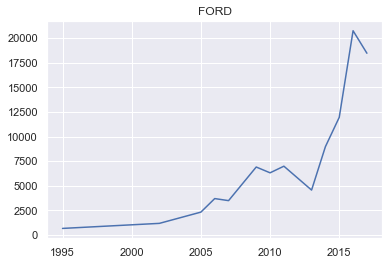

In [8]:
i = 0
for car_data in cars_tab[:1]:
    last = car_data.tail(1)
    print("Predicted value for: ", CARS[i].upper(), ":", last['price'])
    car_data.drop(last.index, inplace=True)

    plt.plot('year', 'price', data=car_data)
    plt.title(CARS[i].upper())
    i += 1
    plt.show()

In [211]:
new_db = cars.pivot(index="car", columns='year', values='mean_price')
new_db

year,1995.0,1996.0,1997.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
car,,,,,,,,,,,,,,,,,,,,,
audi,NaN,3711.92,NaN,NaN,2101.09,NaN,3268.12,4412.28,3455.12,4038.75,...,NaN,12583.17,12746.58,17380.64,NaN,21582.82,35780.71,25913.39,50884.40,101996.03
bmw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10559.90,13213.44,15540.25,18652.97,16894.89,22139.14,NaN,38356.41,NaN,NaN
fiat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1143.92,1610.83,...,3256.68,NaN,35018.09,NaN,10505.43,9221.43,8902.38,8443.80,14471.76,NaN
ford,653.67,NaN,NaN,NaN,NaN,NaN,1167.04,NaN,NaN,2311.19,...,6980.27,NaN,4552.35,8964.63,11946.89,20754.06,18466.21,15828.18,NaN,NaN
nissan,NaN,NaN,NaN,NaN,NaN,700.13,NaN,1354.03,NaN,NaN,...,8847.90,5310.96,NaN,11672.46,6513.37,13306.88,23322.05,18186.06,23836.96,19592.62
opel,NaN,NaN,NaN,NaN,700.13,NaN,NaN,897.64,2544.65,2054.39,...,5591.22,7003.62,5813.00,7275.98,7937.32,5649.24,16784.41,16038.29,NaN,27598.93
peugeot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.92,...,5811.21,7532.78,7725.23,NaN,8499.75,10079.37,NaN,13050.08,NaN,NaN
renault,NaN,NaN,630.33,NaN,NaN,NaN,NaN,1885.14,1999.92,2077.74,...,3548.50,NaN,7085.33,8042.49,8789.54,10030.58,12548.15,12349.71,12979.96,NaN
skoda,NaN,NaN,NaN,NaN,NaN,NaN,2567.99,NaN,NaN,1284.00,...,5065.95,NaN,6746.82,7688.34,7073.66,9081.36,16551.89,12816.62,26644.33,21447.75


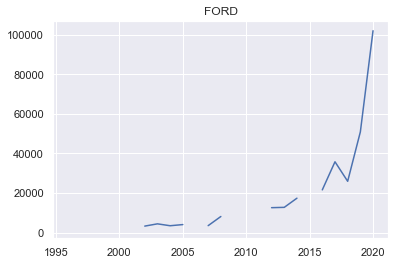

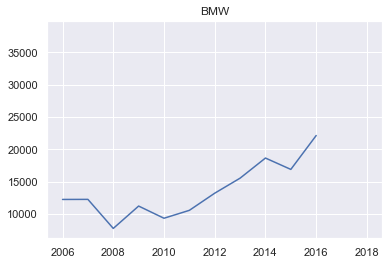

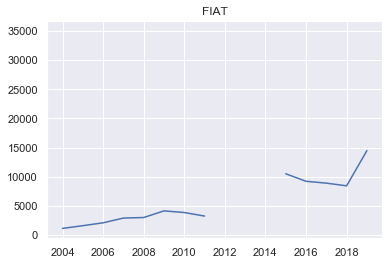

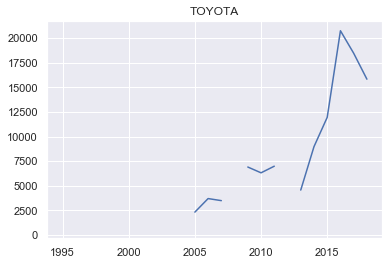

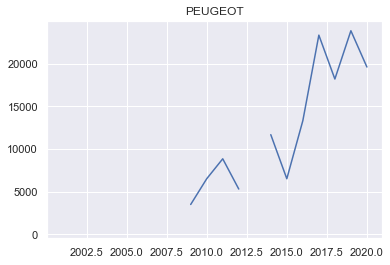

In [212]:
# graphs with missing data
for i in range(5):
    plt.plot(new_db.columns, new_db.values[i])
    plt.title(CARS[i].upper())
    plt.show()

In [213]:
new_db = cars.pivot(index="year", columns='car', values='mean_price')

new_db = new_db.interpolate()
new_db = new_db.bfill()
new_db = new_db.rolling(window=15, min_periods=1).mean()

new_db.head()

car,audi,bmw,fiat,ford,nissan,opel,peugeot,renault,skoda,suzuki,toyota,volkswagen,volvo
year,,,,,,,,,,,,,
1995.0,3711.920000,12244.66,1143.92,653.670000,700.13,700.13,1999.92,630.3300,2567.99,3525.15,4575.7000,1750.9,1622.38
1996.0,3711.920000,12244.66,1143.92,696.450833,700.13,700.13,1999.92,630.3300,2567.99,3525.15,4575.7000,1750.9,1622.38
1997.0,3532.938889,12244.66,1143.92,739.231667,700.13,700.13,1999.92,630.3300,2567.99,3525.15,4575.7000,1750.9,1622.38
1999.0,3309.212500,12244.66,1143.92,782.012500,700.13,700.13,1999.92,693.0705,2567.99,3525.15,4575.7000,1750.9,1622.38
2000.0,3067.588000,12244.66,1143.92,824.793333,700.13,700.13,1999.92,780.9072,2567.99,3525.15,4427.4565,1750.9,1622.38


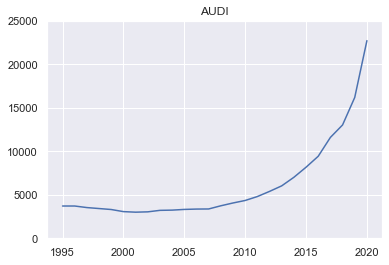

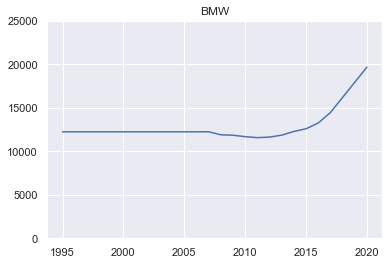

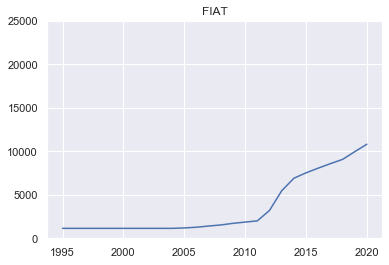

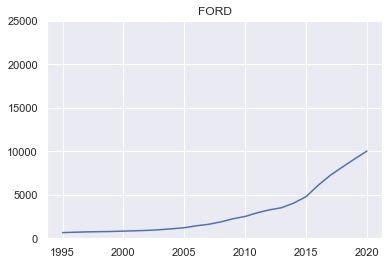

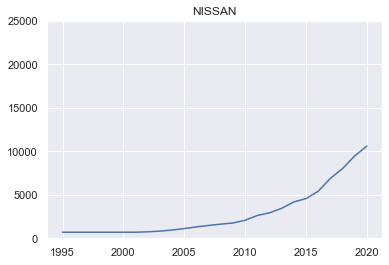

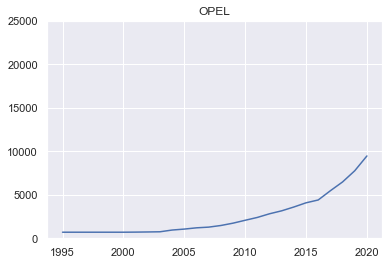

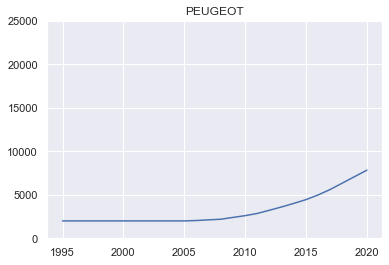

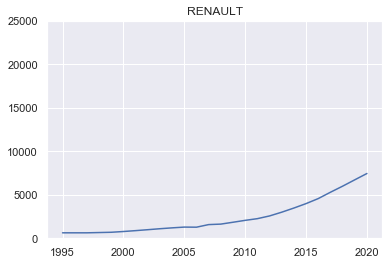

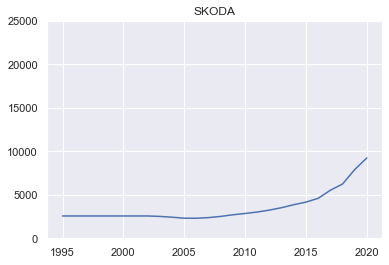

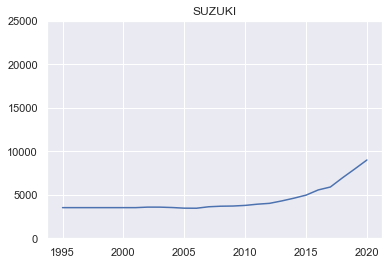

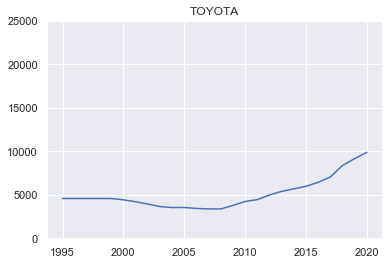

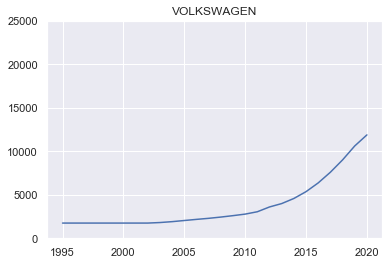

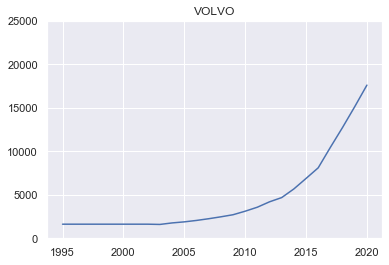

In [214]:
for ind, data in new_db.iteritems():
    plt.plot(data.index, data.values)
    plt.title(ind.upper())
    axes = plt.gca()
    axes.set_ylim([0,25000])
    plt.savefig(f'graphs/graph_{ind}.png')
    
    plt.show()


In [245]:
# predicting prices
data = new_db
data_ind = data.index.astype(int)
data.index = data_ind
data

car,audi,bmw,fiat,ford,nissan,opel,peugeot,renault,skoda,suzuki,toyota,volkswagen,volvo
year,,,,,,,,,,,,,
1995,3711.920000,12244.660000,1143.920000,653.670000,700.130000,700.130000,1999.920000,630.330000,2567.990000,3525.150000,4575.700000,1750.900000,1622.380000
1996,3711.920000,12244.660000,1143.920000,696.450833,700.130000,700.130000,1999.920000,630.330000,2567.990000,3525.150000,4575.700000,1750.900000,1622.380000
1997,3532.938889,12244.660000,1143.920000,739.231667,700.130000,700.130000,1999.920000,630.330000,2567.990000,3525.150000,4575.700000,1750.900000,1622.380000
1999,3309.212500,12244.660000,1143.920000,782.012500,700.130000,700.130000,1999.920000,693.070500,2567.990000,3525.150000,4575.700000,1750.900000,1622.380000
2000,3067.588000,12244.660000,1143.920000,824.793333,700.130000,700.130000,1999.920000,780.907200,2567.990000,3525.150000,4427.456500,1750.900000,1622.380000
2001,3003.757500,12244.660000,1143.920000,867.574167,700.130000,711.102778,1999.920000,881.292000,2567.990000,3525.150000,4205.091250,1750.900000,1622.380000
2002,3041.523571,12244.660000,1143.920000,910.355000,746.837143,728.345714,1999.920000,988.847143,2567.990000,3585.181429,3940.370714,1750.900000,1622.380000
2003,3212.868125,12244.660000,1143.920000,990.113542,822.736250,749.507500,1999.920000,1100.883750,2514.490417,3582.531667,3649.178125,1812.181667,1594.672500
2004,3239.785000,12244.660000,1143.920000,1094.523889,951.805185,948.967778,1999.920000,1200.776667,2425.324444,3538.094444,3535.531111,1914.317778,1767.667778


In [251]:
# predict = car_data.tail(1)
predict = car_data.values[-1]
# data = data.drop(2020)
# car_data.drop(last.index, inplace=True)
# for i, r in data.iteritems():
#     if r.index == 2020:
int(predict)

22724